In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/run/media/vincenzo/TOSHIBA EXT/CovellaScript/computeNodesCSV/mpp3r03c04s03.csv', header=0, index_col=0, parse_dates=True)

In [22]:
col_cpu0 = []
for col in df.columns:
    if "cpu0" in col:
        col_cpu0.append(col)
col_cpu0.append("faultLabel")

In [23]:
df_cpu0 = df[col_cpu0]

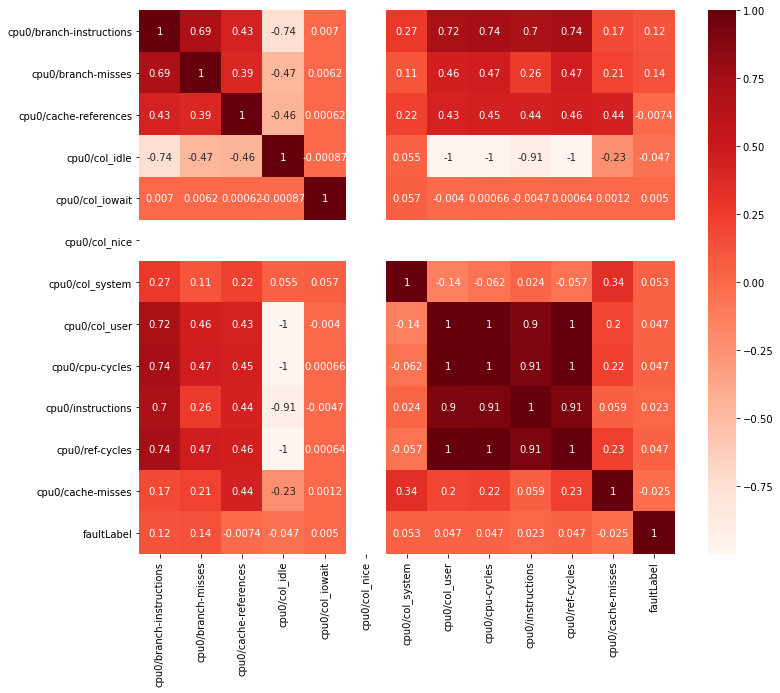

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor_cpu0 = df_cpu0.corr()
sns.heatmap(cor_cpu0, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
df['cpu0/col_nice'].head()

Time
2020-03-13 12:07:46    0.0
2020-03-13 12:07:47    0.0
2020-03-13 12:07:48    0.0
2020-03-13 12:07:49    0.0
2020-03-13 12:07:50    0.0
Name: cpu0/col_nice, dtype: float64

Text(0.5, 1.0, 'cpu0/col_nice')

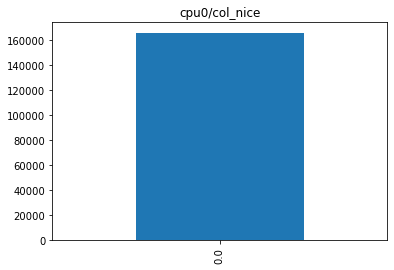

In [26]:
df['cpu0/col_nice'].value_counts(sort=False).sort_index().plot(kind='bar').set_title("cpu0/col_nice")

In [27]:
#Correlation with output variable
cor_target = abs(cor_cpu0["faultLabel"])
#Selecting highly correlated features
relevant_features = cor_target.sort_values(kind="quicksort")
relevant_features

cpu0/col_iowait             0.005024
cpu0/cache-references       0.007379
cpu0/instructions           0.023418
cpu0/cache-misses           0.025495
cpu0/col_user               0.046673
cpu0/ref-cycles             0.046737
cpu0/cpu-cycles             0.046882
cpu0/col_idle               0.047145
cpu0/col_system             0.053298
cpu0/branch-instructions    0.119110
cpu0/branch-misses          0.139694
faultLabel                  1.000000
cpu0/col_nice                    NaN
Name: faultLabel, dtype: float64

In [28]:
cor_total = df.corr()
cor_target2 = abs(cor_total["faultLabel"])
sorted_features = cor_target2.sort_values(kind="quicksort", ascending=False)
sorted_features

faultLabel                             1.000000
faultPred                              0.407934
ctxt                                   0.355956
numa_interleave                        0.339437
opaif0/portXmitPackets                 0.289015
                                         ...   
thp_zero_page_alloc                         NaN
thp_zero_page_alloc_failed                  NaN
opaif0/portRcvErrors                        NaN
opaif1/excessiveBufferOverrunErrors         NaN
cpu36/col_iowait                            NaN
Name: faultLabel, Length: 862, dtype: float64

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(sorted_features)

faultLabel                             1.000000
faultPred                              0.407934
ctxt                                   0.355956
numa_interleave                        0.339437
opaif0/portXmitPackets                 0.289015
cpu42/branch-misses                    0.232668
cpu43/col_system                       0.229400
cpu43/branch-misses                    0.191908
cpu9/col_system                        0.187363
cpu3/col_system                        0.183111
cpu2/col_system                        0.179932
cpu7/col_system                        0.175218
opaif0/portXmitData                    0.174075
cpu11/col_system                       0.167658
cpu13/col_system                       0.167268
cpu15/col_system                       0.162417
cpu17/branch-misses                    0.153877
softirq                                0.151376
cpu8/col_system                        0.148679
branch-misses                          0.142522
cpu3/branch-misses                     0

In [30]:
cpulist = ["col_system", "branch-misses", "branch-instructions"]

cpu0/col_iowait             0.005024
cpu0/cache-references       0.007379
cpu0/instructions           0.023418
cpu0/cache-misses           0.025495
cpu0/col_user               0.046673
cpu0/ref-cycles             0.046737
cpu0/cpu-cycles             0.046882
cpu0/col_idle               0.047145

In [38]:
new_df = df.loc[:, ~df.columns.str.contains('cpu[0-9]+\/col_iowait|cpu[0-9]+\/cache-references|cpu[0-9]+\/instructions|cpu[0-9]+\/cache-misses|cpu[0-9]+\/col_user|cpu[0-9]+\/ref-cycles|cpu[0-9]+\/cpu-cycles|cpu[0-9]+\/col_idle|cpu[0-9]+\/col_nice')]

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(list(new_df.columns))

['Active-anon', 'Active-file', 'Active', 'AnonPages', 'branch-misses', 'btime', 'busyLabel', 'cache-misses', 'cache-references', 'Cached', 'col_idle', 'col_iowait', 'col_nice', 'col_system', 'col_user', 'cpu-cycles', 'cpu0/branch-instructions', 'cpu0/branch-misses', 'cpu0/col_system', 'cpu10/branch-instructions', 'cpu10/branch-misses', 'cpu1/col_system', 'cpu20/branch-instructions', 'cpu20/branch-misses', 'cpu10/col_system', 'cpu11/branch-instructions', 'cpu11/branch-misses', 'cpu11/col_system', 'cpu12/branch-instructions', 'cpu12/branch-misses', 'cpu12/col_system', 'branch-instructions', 'cpu15/branch-instructions', 'cpu13/branch-instructions', 'cpu13/branch-misses', 'cpu13/col_system', 'cpu14/branch-instructions', 'cpu14/branch-misses', 'cpu14/col_system', 'cpu15/branch-misses', 'cpu15/col_system', 'cpu16/branch-instructions', 'cpu16/branch-misses', 'cpu16/col_system', 'cpu17/branch-instructions', 'cpu17/branch-misses', 'cpu17/col_system', 'cpu18/branch-instructions', 'cpu18/branch-m